### Step 1 - Importing Libraries and Dataset

In [1]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [2]:
combined_dataset = pd.read_pickle(r"C:\Users\Windows\Instacart Basket Analysis\02 Data\Prepared Data\combined_dataset.pkl")

In [3]:
combined_dataset.head(5)

,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,hour_of_day_ordered,...,ord_freq_flag,First Name,Surname,Gender,State,Age,date_joined,n_dependants,fam_status,income
0,1,Chocolate Sandwich Cookies,19,19,5.8,3139998,138,28,6,11,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
1,1,Chocolate Sandwich Cookies,19,19,5.8,1977647,138,30,6,17,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
2,907,Premium Sliced Bacon,12,12,20.0,3160996,138,1,5,13,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
3,907,Premium Sliced Bacon,12,12,20.0,2254091,138,10,5,14,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620
4,1000,Apricots,10,10,12.9,505689,138,9,6,12,...,Frequent customer,Charles,Cox,Male,Minnesota,81,8/1/2019,1,married,49620


In [4]:
combined_dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32404859 entries, 0 to 32404858
Data columns (total 31 columns):
 #   Column                  Dtype   
---  ------                  -----   
 0   product_id              int32   
 1   product_name            category
 2   aisle_id                int16   
 3   department_id           int8    
 4   prices                  float64 
 5   order_id                int32   
 6   user_id                 int32   
 7   order_number            int8    
 8   orders_day_of_week      int8    
 9   hour_of_day_ordered     int8    
 10  days_since_prior_order  float16 
 11  add_to_cart_order       int16   
 12  reordered               int8    
 13  busiest_days            category
 14  busiest_period_of_day   category
 15  price_range_loc         category
 16  max_order               int8    
 17  loyalty_flag            category
 18  avg_spending            float64 
 19  spender_flag            category
 20  last_order              float16 
 21  ord_fr

### Step 2 - See Task 4.9 - Part 0 

### Step 3 

In [5]:
# replace prices > 100 with NaN
combined_dataset.loc[combined_dataset['prices']> 100, 'prices'] = np.nan

In [6]:
# test to see the maxium price
combined_dataset['prices'].max()

25.0

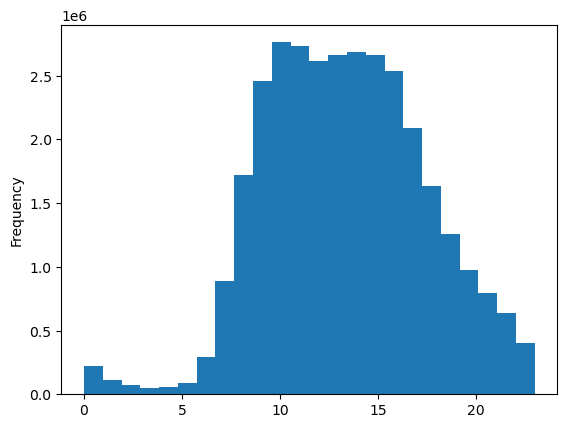

In [7]:
# create a histogram of " hour_of_day_ordered"
hist = combined_dataset['hour_of_day_ordered'].plot.hist(bins = 24)

#### There is a peak hour for ordering at around 11 am.

### Step 4

<Axes: >

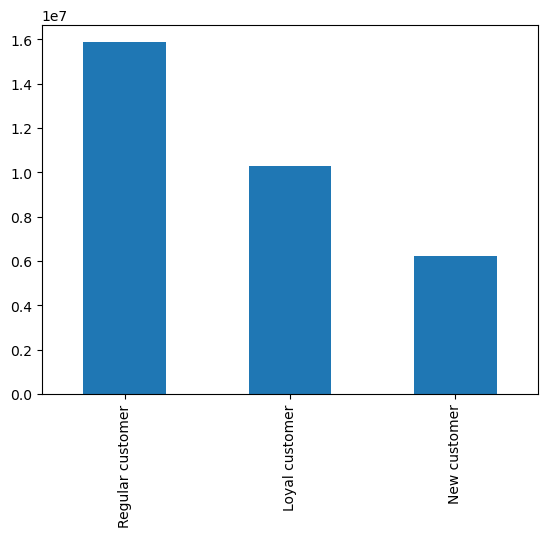

In [8]:
# Create a bar chart from the “loyalty_flag” column

combined_dataset['loyalty_flag'].value_counts().plot.bar()

### Step 5 

In [9]:
#Check whether there’s a difference in expenditure (the “prices” column) depending on the hour of the day

np.random.seed(4)
dev = np.random.rand(len(combined_dataset)) <= 0.7

In [10]:
dev

array([False,  True, False, ...,  True,  True,  True])

In [11]:
# store 70% of the sample in the dataframe  big

big = combined_dataset[dev]

In [12]:
# store 30% of the sample in the dataframe small
small = combined_dataset[~dev]

In [13]:
len(combined_dataset)

32404859

In [14]:
len(big)+len(small)

32404859

In [15]:
subset = small[['prices', 'hour_of_day_ordered']]

In [16]:
subset.head()

,prices,hour_of_day_ordered
0,5.8,11
2,20.0,13
3,20.0,14
6,4.4,13
10,12.8,9


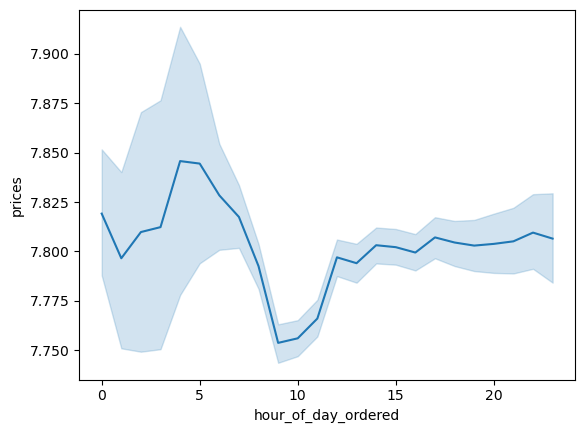

In [17]:
line = sns.lineplot(x ='hour_of_day_ordered', y ='prices', data = subset)

### Step 6

In [18]:
# whether there is connection between age and family situation
subset_1 = small[['Age', 'n_dependants']]

In [19]:
subset_1.head()

,Age,n_dependants
0,81,1
2,81,1
3,81,1
6,81,1
10,81,1


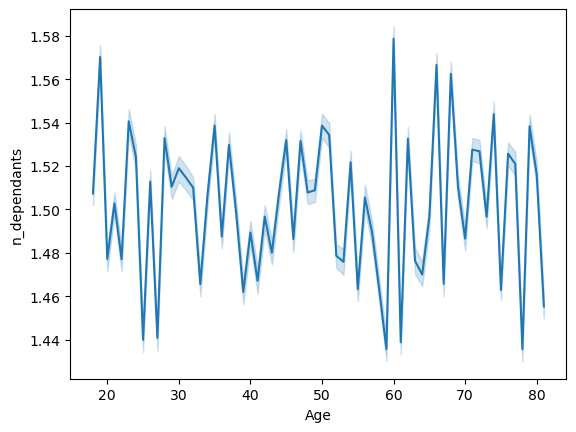

In [20]:
line_1 = sns.lineplot(x ='Age', y ='n_dependants', data = subset_1)

#### Based on the line plot, there is no discernible linear relationship between Age and number of dependants at least from this dataset.

### Step 7

In [21]:
# whether there’s a connection between age and spending power (income)
subset_2 = small[['Age', 'income']]

In [22]:
subset_2.head()

,Age,income
0,81,49620
2,81,49620
3,81,49620
6,81,49620
10,81,49620


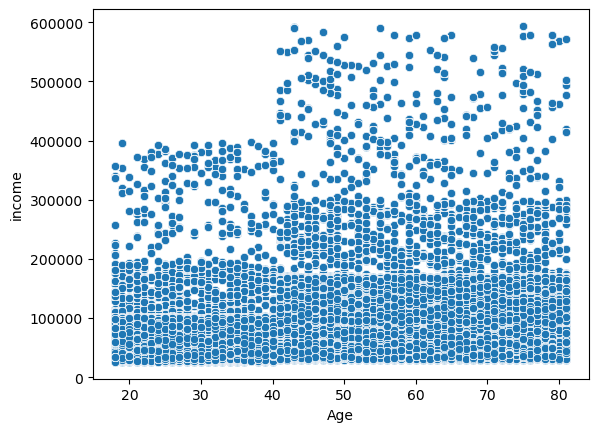

In [23]:
scatter_plot = sns.scatterplot(x ='Age', y ='income', data = subset_2)

#### Based on the scatterplot, the income increasees with age but plateaus off around age 50 

### Step 8 - Exporting visualizations to relevant project folder 

In [24]:
path = r"C:\Users\Windows\Instacart Basket Analysis"

In [25]:
line.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_hour_prices.png'))

In [26]:
line_1.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'line_age_dependants.png'))

In [27]:
scatter_plot.figure.savefig(os.path.join(path, '04 Analysis','Visualizations', 'age_income.png'))